<a href="https://colab.research.google.com/github/PacoSuarez7/The-Leqaning-Gate/blob/main/Solucion_Reto_SC_63_Francisco_Suarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import pandas as pd
import numpy as np
from sklearn import cluster, datasets, metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns


file_csv = '/content/drive/My Drive/Colab Notebooks/bank_marketing_RETO_DS_AS.csv'
data = pd.read_csv(file_csv)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


#5. Obtén la información de dicha base de datos

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


#6. Transforma las variables categóricas

In [122]:
data.iloc[:,15].value_counts()

unknown    6783
failure    1006
success     770
other       441
Name: poutcome, dtype: int64

In [123]:
le = LabelEncoder()

cols = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']

data[cols] = data[cols].apply(LabelEncoder().fit_transform)

data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,married,2,0,2666,0,0,0,10,9,318,2,97,6,success,1
1,29,10,single,3,0,1584,0,0,0,6,11,245,1,-1,0,unknown,1
2,41,1,married,1,0,2152,1,0,0,17,9,369,1,-1,0,unknown,0
3,50,1,married,1,0,84,1,0,0,17,5,18,8,-1,0,unknown,0
4,40,0,married,1,0,0,0,0,0,28,5,496,2,182,11,success,1


In [124]:
data = pd.get_dummies(data, columns=['marital', 'poutcome'])
data.head(5)

,age,job,education,default,balance,housing,loan,contact,day,month,...,pdays,previous,y,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,31,6,2,0,2666,0,0,0,10,9,...,97,6,1,0,1,0,0,0,1,0
1,29,10,3,0,1584,0,0,0,6,11,...,-1,0,1,0,0,1,0,0,0,1
2,41,1,1,0,2152,1,0,0,17,9,...,-1,0,0,0,1,0,0,0,0,1
3,50,1,1,0,84,1,0,0,17,5,...,-1,0,0,0,1,0,0,0,0,1
4,40,0,1,0,0,0,0,0,28,5,...,182,11,1,0,1,0,0,0,1,0


In [125]:
# verifiando el balanceo de las clases:

print('Porcentaje de clientes subscritos: ', 100 * sum(data['y']) / data.shape[0] )
print('Porcentaje de clientes no subscritos: ', 100 * (1 - sum(data['y']) / data.shape[0]))

Porcentaje de clientes subscritos:  42.077777777777776
Porcentaje de clientes no subscritos:  57.92222222222223


#7. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo

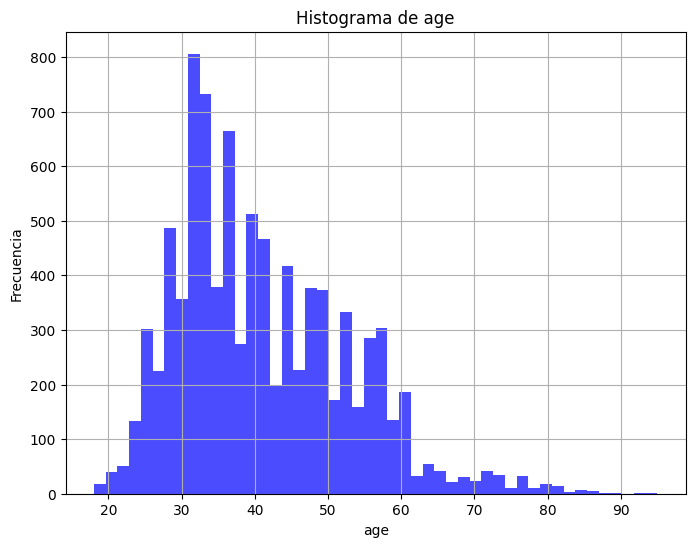

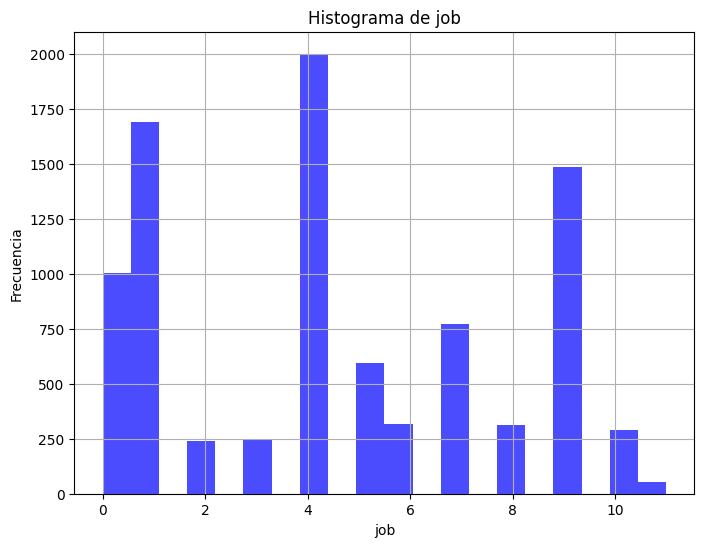

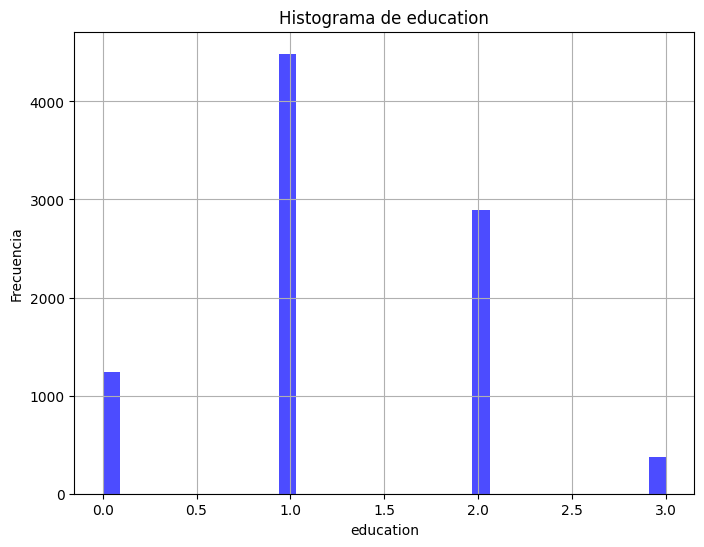

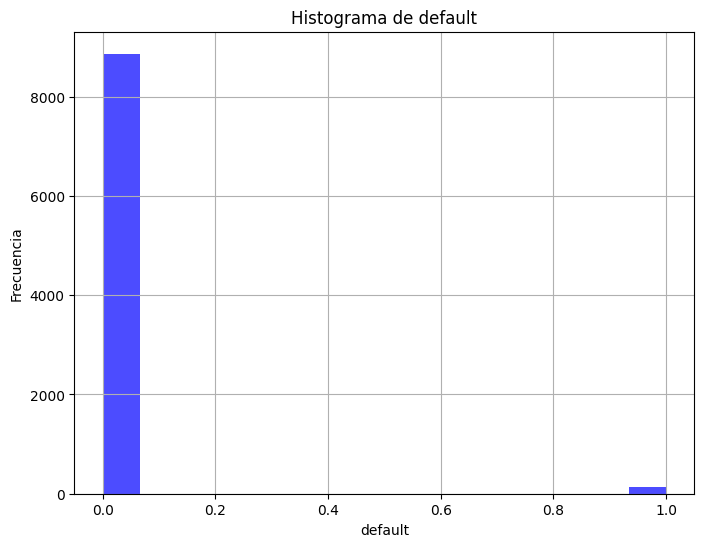

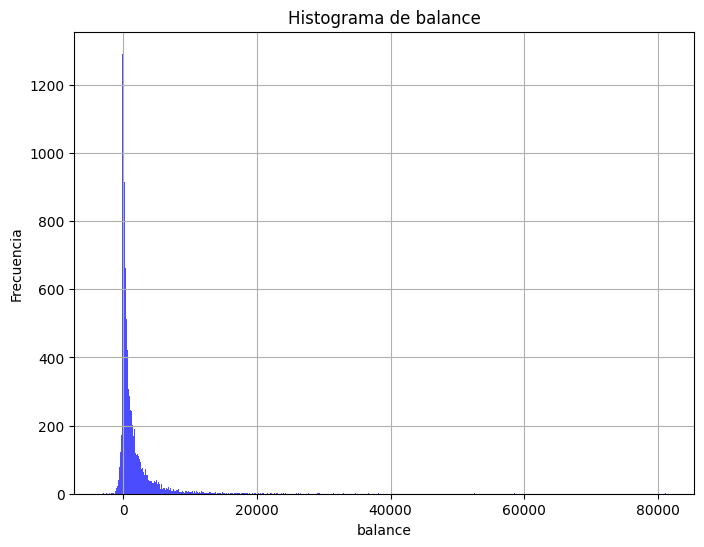

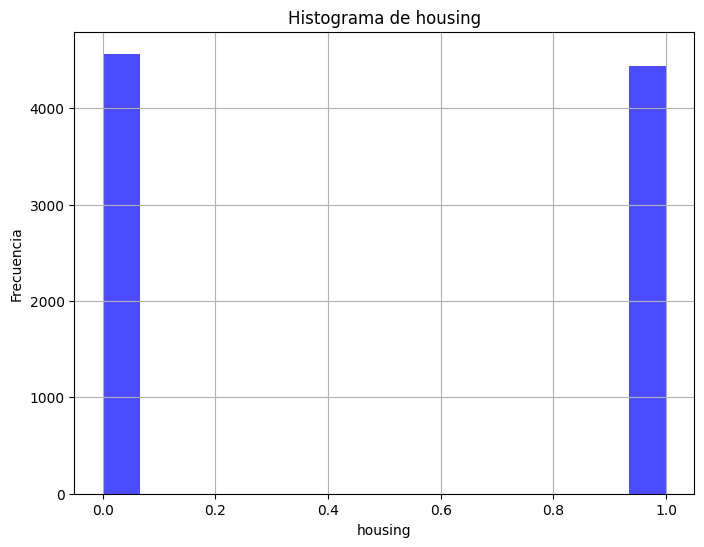

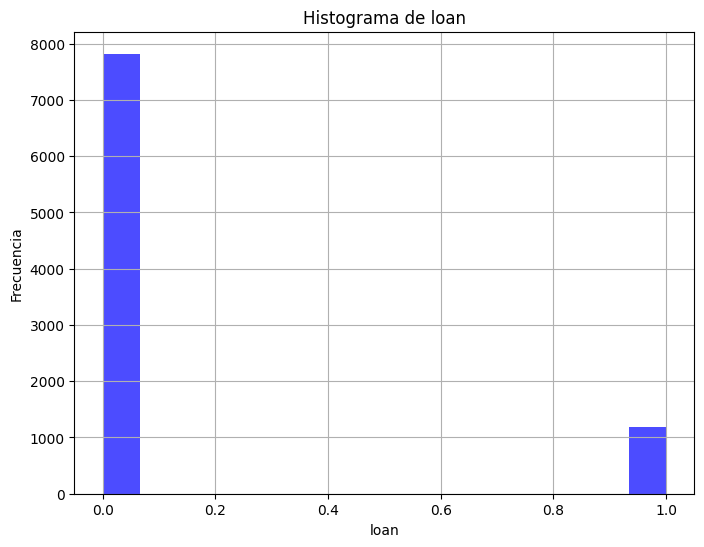

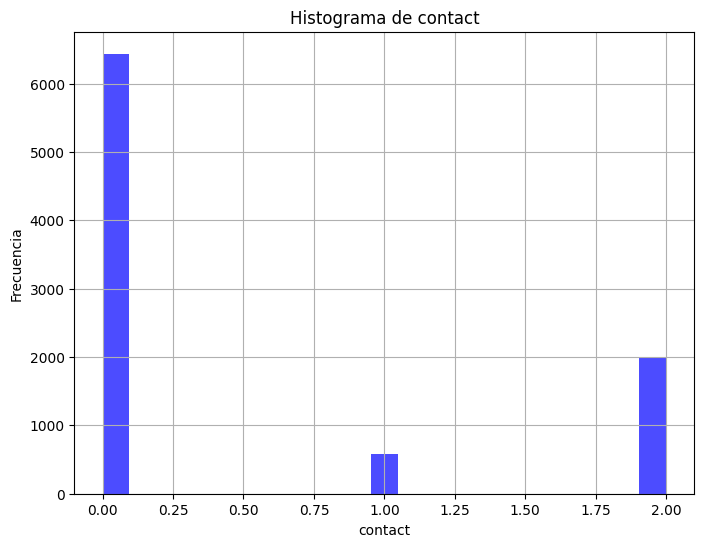

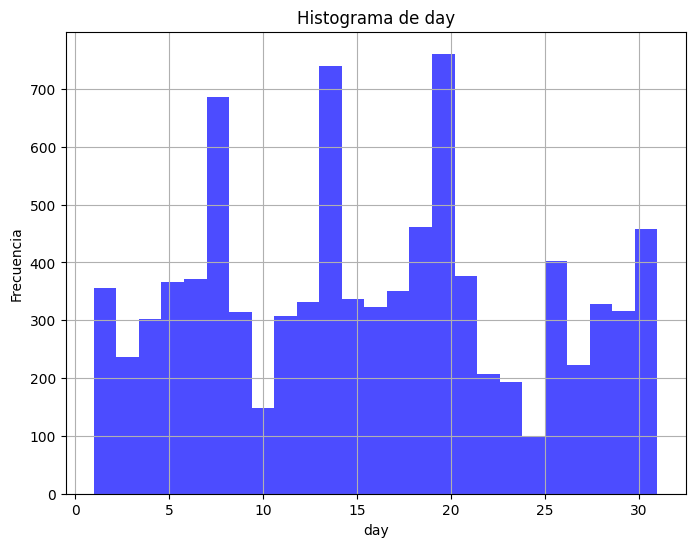

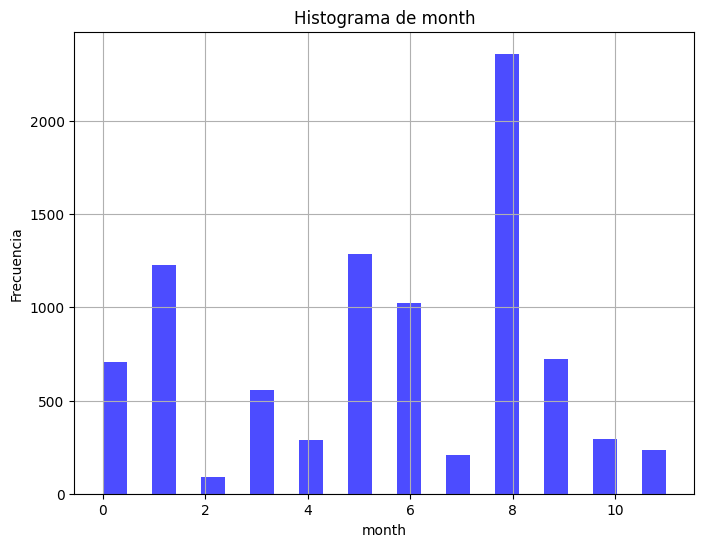

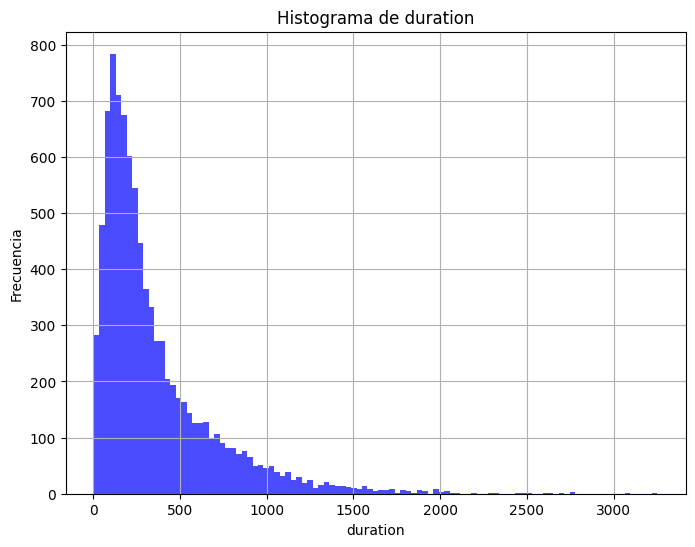

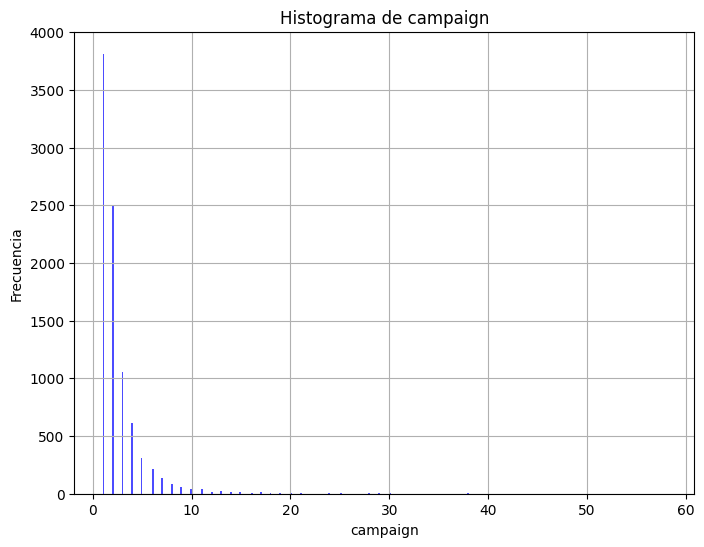

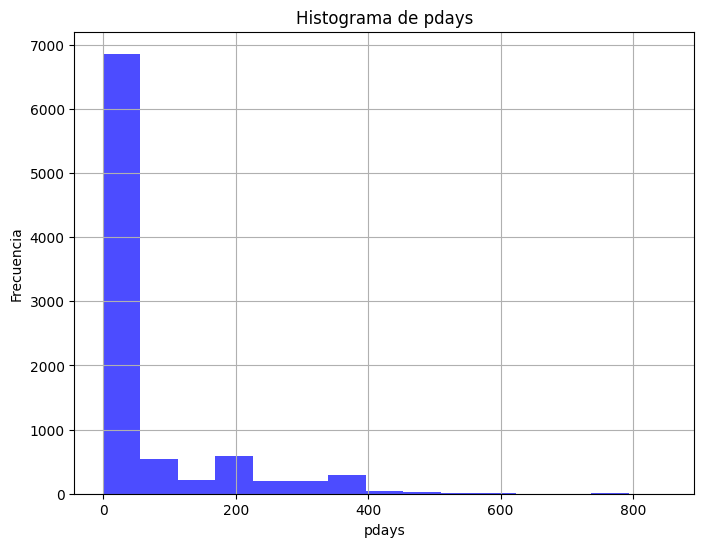

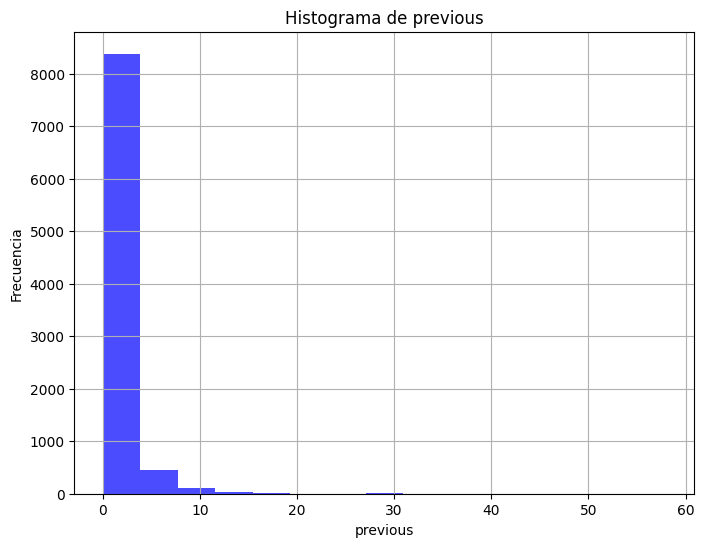

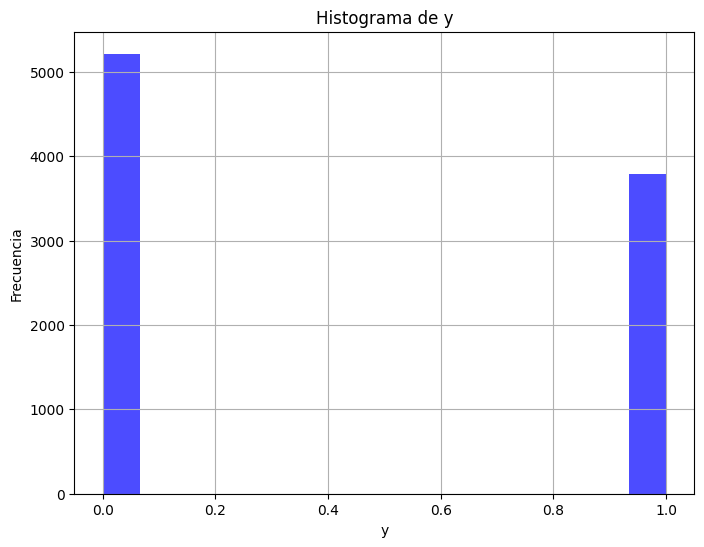

In [126]:
int_columns = data.select_dtypes(include='int64')

# Crear histogramas para cada columna dentro de un bucle for
for column in int_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(int_columns[column], bins='auto', color='blue', alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

In [127]:
def fun1(X):    #Con sesgo positivo
  return np.log(X + 1)

def fun2(X):    #Con sesgo negativo
  return np.log(1 - X)

def fun3(X):    #Estandarizacion
  return (X - np.mean(X)) / np.std(X)

def fun4(X):    #Datos entre 0 y 1 (normalizacion)
  return (X - np.min(X)) / (np.max(X) - np.min(X))

def fun5(X):    #sqrt 2
  return np.sqrt(X)

def fun6(X):    #power
  return np.power(X, 0.2)

In [128]:
data['previous'].describe()

count    9000.000000
mean        0.788889
std         2.210273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.000000
Name: previous, dtype: float64

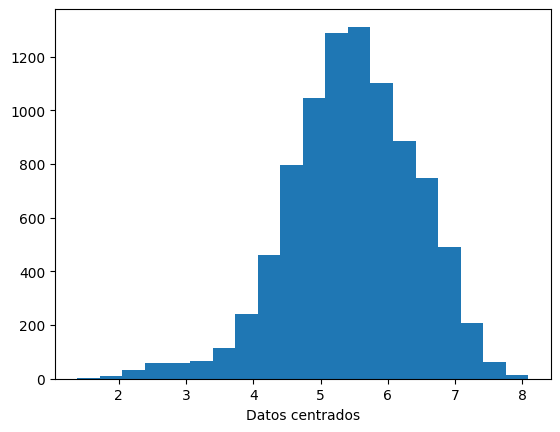

In [129]:
variable = data['duration'] # age balace day duration campaign pdays previous

plt.hist(fun1(variable), bins=20)
plt.xlabel('Datos centrados')
plt.show()

In [130]:
data[['age', 'duration', 'campaign', 'previous']] = fun1(data[['age', 'duration', 'campaign', 'previous']])
data[['balance']] = fun1(fun4(data[['balance']]))
data[['day', 'pdays']] = fun3(data[['day', 'pdays']])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430

In [131]:
data.head()

,age,job,education,default,balance,housing,loan,contact,day,month,...,pdays,previous,y,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,3.465736,6,2,0,0.065723,0,0,0,-0.673417,9,...,0.431706,1.945910,1,0,1,0,0,0,1,0
1,3.401197,10,3,0,0.053626,0,0,0,-1.152755,11,...,-0.478348,0.000000,1,0,0,1,0,0,0,1
2,3.737670,1,1,0,0.059995,1,0,0,0.165425,9,...,-0.478348,0.000000,0,0,1,0,0,0,0,1
3,3.931826,1,1,0,0.036610,1,0,0,0.165425,5,...,-0.478348,0.000000,0,0,1,0,0,0,0,1
4,3.713572,0,1,0,0.035649,0,0,0,1.483605,5,...,1.221038,2.484907,1,0,1,0,0,0,1,0


In [132]:
data.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

#8. Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada

In [133]:
X = data[['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]
Y = data['y']

X = X.values
Y = Y.values

#9. Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente

In [134]:
from sklearn.model_selection import train_test_split

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y, train_size=.60)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.50)

In [135]:
print("Dimensión X_train_set:\t\t", x_train.shape)
print("Dimensión X_validation_set:\t", x_validation.shape)
print("Dimension X_test_set:\t\t", x_test.shape)

print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_validation:\t\t", y_validation.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 21)
Dimensión X_validation_set:	 (1800, 21)
Dimension X_test_set:		 (1800, 21)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)


#10. Aplica el modelo Regresión Logística

In [136]:
exactitud = []

for k in range(0,10):
  x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y, train_size=.60)
  x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.50)

  clf = LogisticRegression( C=1.0, solver='newton-cg', max_iter=1000 )
  modelo_RL = clf.fit( x_train, y_train )

  # veamos cómo se comportan ahora en el conjunto de validación:
  exactitud.append(modelo_RL.score(x_validation, y_validation))



print("Exactitud (Accuracy) promedio:", np.mean(exactitud))
print("y desviación estándar:", np.std(exactitud)  )

Exactitud (Accuracy) promedio: 0.8102777777777778
y desviación estándar: 0.006316009444945584


In [137]:
pr = modelo_RL.predict(x_validation)

confusion_matrix(y_validation, pr)

array([[902, 140],
       [184, 574]])

In [138]:
parameters = {'C':[0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
              'penalty':('l2','elasticnet', 'None'),
              'solver':('newton-cg','saga','lbfgs','sag')}

In [139]:
from sklearn.model_selection import GridSearchCV

RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(x_train, np.ravel(y_train))

print(modelo_RL_grid)

print("Los mejores valores encontrados son %s con un score de %0.2f"
      % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))

print(modelo_RL_grid.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'None'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.28, 'penalty': 'l2', 'solver': 'sag'} con un score de 0.81
0.8


In [144]:
exactitud = []

for k in range(0,10):
  x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y, train_size=.60)
  x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.50)

  clf = LogisticRegression( C=0.28, penalty='l2', solver='sag', max_iter=1000 )
  modelo_RL = clf.fit( x_train, y_train )

  # veamos cómo se comportan ahora en el conjunto de validación:
  exactitud.append(modelo_RL.score(x_validation, y_validation))



print("Exactitud (Accuracy) promedio:", np.mean(exactitud))
print("y desviación estándar:", np.std(exactitud)  )

Exactitud (Accuracy) promedio: 0.8064444444444444
y desviación estándar: 0.0061624109439386955


In [145]:
pr = modelo_RL.predict(x_validation)

confusion_matrix(y_validation, pr)

array([[900, 147],
       [199, 554]])

#11. Aplica el modelo Red Neuronal

In [140]:
import numpy as np
from sklearn.neural_network import MLPRegressor

modelo_NNR = MLPRegressor(hidden_layer_sizes=(10,4), max_iter=5000)
modelo_NNR.fit(x_train, y_train)

pred = modelo_NNR.predict(x_test)

In [141]:
neuronas = [i for i in range(1, 50, 5)]

print(neuronas)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]


>1, train: 0.583, test: 0.569, losstrain: 0.417, losstest: 0.431
>6, train: 0.814, test: 0.797, losstrain: 0.186, losstest: 0.203
>11, train: 0.820, test: 0.804, losstrain: 0.180, losstest: 0.196
>16, train: 0.824, test: 0.806, losstrain: 0.176, losstest: 0.194
>21, train: 0.824, test: 0.802, losstrain: 0.176, losstest: 0.198
>26, train: 0.830, test: 0.807, losstrain: 0.170, losstest: 0.193
>31, train: 0.834, test: 0.812, losstrain: 0.166, losstest: 0.188
>36, train: 0.820, test: 0.795, losstrain: 0.180, losstest: 0.205
>41, train: 0.838, test: 0.821, losstrain: 0.162, losstest: 0.179
>46, train: 0.830, test: 0.818, losstrain: 0.170, losstest: 0.182


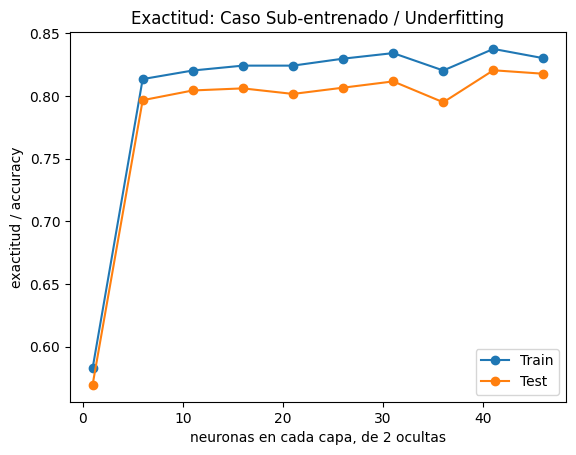

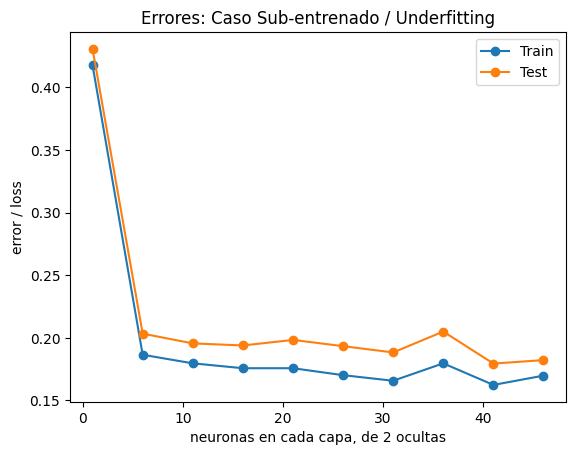

In [142]:
train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes=(i,i),
                        max_iter=1000,
                        alpha=0.7,   #Ajustar en caso de que el modelo este sobre-entrenado o sub-entrenado
                        random_state=42)

  model.fit(x_train, y_train)

  # TRAIN set
  train_yhat = model.predict(x_train)

  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)


  # TEST set
  test_yhat = model.predict(x_test)

  test_loss = np.mean(abs(y_test - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)


  # progreso de las épocas del entrenamiento ...
  print('>%d, train: %.3f, test: %.3f, losstrain: %.3f, losstest: %.3f' % (i, train_acc, test_acc, train_loss, test_loss))

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud: Caso Sub-entrenado / Underfitting')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('exactitud / accuracy')
plt.show()

plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.legend()
plt.title('Errores: Caso Sub-entrenado / Underfitting')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('error / loss')
plt.show()

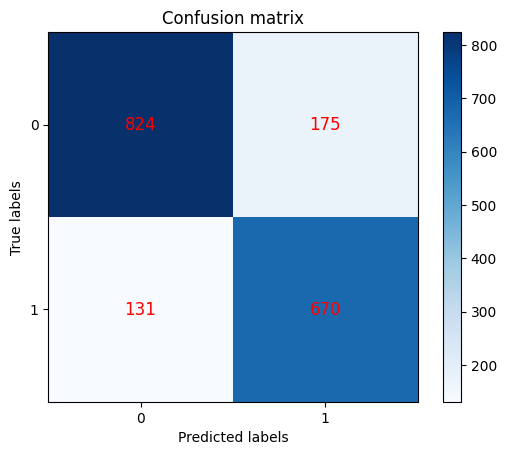

In [150]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, x_test, y_test, labels=[0, 1]):
    cm = confusion_matrix(y_test, model.predict(x_test))

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()

    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)

    # Añadir anotaciones numéricas
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red', fontsize=12)

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion matrix')
    plt.show()
plot_confusion_matrix(model, x_test, y_test, labels=[0,1])

#12. Selecciona el mejor modelo encontrado

Best Model: Neural networks
>41, train: 0.837, test: 0.814, losstrain: 0.163, losstest: 0.186


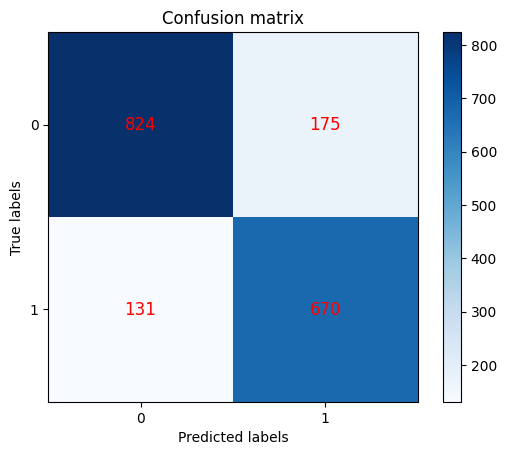

In [156]:
print('Best Model: Neural networks')
#resultado del modelo
print('>41, train: 0.837, test: 0.814, losstrain: 0.163, losstest: 0.186')
#Matriz de confusion
plot_confusion_matrix(model, x_test, y_test, labels=[0,1])

#13. Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

In [159]:
print('''La IA ofrece herramientas y enfoques avanzados que pueden transformar la forma en que las empresas abordan sus estrategias de mercadotecnia.
- Por ejemplo puede ser muy util en la segmentacion de los clientes, para que se lanzen campañas a grupos especificos de gente.
- Tambien aplicable en el analisis de recomendaciones dentro de un ecommerce.
- O tambien para realizar un analisis de sentimientos en los reviews de las diferentes plataformas de redes sociales de la empresa.
y se puede hacer mucho mas...
''')

La IA ofrece herramientas y enfoques avanzados que pueden transformar la forma en que las empresas abordan sus estrategias de mercadotecnia. 
- Por ejemplo puede ser muy util en la segmentacion de los clientes, para que se lanzen campañas a grupos especificos de gente.
- Tambien aplicable en el analisis de recomendaciones dentro de un ecommerce.
- O tambien para realizar un analisis de sentimientos en los reviews de las diferentes plataformas de redes sociales de la empresa.
y se puede hacer mucho mas...

